# 使用Scikit-learn各種迴歸演算法預測人臉下半部

## 載入相關套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

## 載入資料集

In [2]:
data, targets = fetch_olivetti_faces(return_X_y=True)

## 資料分割

In [3]:
train = data[targets < 30]
test = data[targets >= 30]  

## 模型訓練

In [7]:
n_pixels = data.shape[1]
# 人臉上半部為 X，人臉下半部為 Y
X_train = train[:, : (n_pixels + 1) // 2]
y_train = train[:, n_pixels // 2 :]

# 使用各種迴歸演算法
ESTIMATORS = {
    "迴歸樹": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

# 訓練
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)

## 測試 5 筆資料

In [8]:
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

# 預測
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    y_test_predict[name] = estimator.predict(X_test)

## 依照各種迴歸演算法測試結果繪製人臉

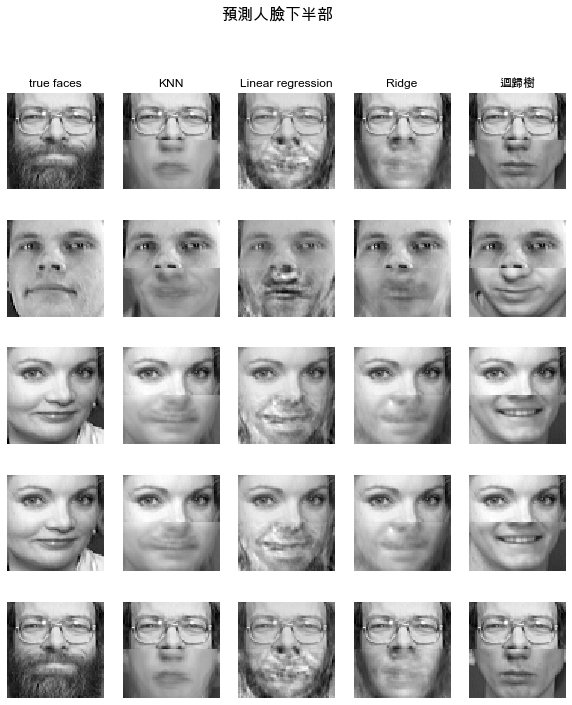

In [10]:
# 修正中文亂碼
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

# 設定圖片寬/高
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("預測人臉下半部", size=16)

# 繪圖
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i>0:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    # 依照各種迴歸演算法繪製人臉
    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )